In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [4]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
import os
fn = os.getcwd() + "\\" +  "mymodel.h5"  
model.load_weights(fn)

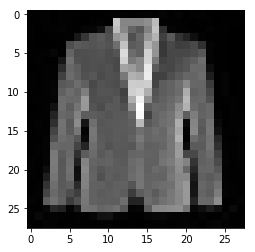

[4]
Coat


In [24]:
import cv2
gray = cv2.imread("coat.jpg", cv2.IMREAD_GRAYSCALE)
gray = cv2.resize(255-gray, (28, 28))
# gray = gray/255
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()
pr = model.predict_classes(gray.reshape(1, 28, 28))
print(pr)
print(class_names[pr[0]])

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


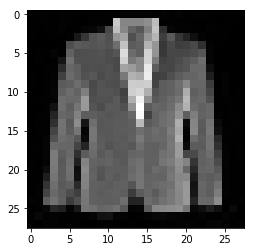

28
[4]
Coat


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('coat.jpg')     
gray = rgb2gray(img)    
# plt.imshow(gray, cmap=plt.get_cmap('gray'))
# plt.show()
gray2 = resize(gray, (28, 28))

gray3 = np.full((28,28),255)
gray3= gray3 - gray2 
plt.imshow(gray3, cmap=plt.get_cmap('gray'))
plt.show()

print(len(gray3))
pr = model.predict_classes(gray3.reshape(1, 28, 28))
print(pr)
print(class_names[pr[0]])
